## Описание проекта

Необходимо проверить гипотезы относительно увеличения выручки, провести A/B тест и проанализировать результаты для отдела маркетинга крупного интернет-магазина.


**Описание данных**


Содержание файла для проверки гипотез **datasets/hypothesis.csv**: 1) **Hypothesis** — краткое описание гипотезы; 2) **Reach** — охват пользователей по 10-балльной шкале; 3) **Impact** — влияние на пользователей по 10-балльной шкале; 4) **Confidence** — уверенность в гипотезе по 10-балльной шкале; 5) **Efforts** — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.


Сожержание файлов с результатами A/B тестов:

**datasets/orders.csv:** 1) **transactionId** — идентификатор заказа; 2) **visitorId** — идентификатор пользователя, совершившего заказ; 3) **date** — дата, когда был совершён заказ; 4) **revenue** — выручка заказа; 5) **group** — группа A/B-теста, в которую попал заказ.


**datasets/visitors.csv:** 1) **date** — дата; 2) **group** — группа A/B-теста; 3) **visitors** — количество пользователей в указанную дату в указанной группе A/B-теста.


**Задачи:**
<br>1. С помощью фреймворков приоритизировать гипотезы
<br>2. Проанализировать A/B-тест:
<br>1) Пострить график кумулятивной выручки по группам, сделать выводы и предположения.
<br>2) Построить график кумулятивного среднего чека по группам, сделать выводы и предположения.
<br>3) Построить график относительного изменения кумулятивного среднего чека группы B к группе A. Сделать выводы и предположения.
<br>4) Построить график кумулятивного среднего количества заказов на посетителя по группам. Сделать выводы и предположения.
<br>5) Построить график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделать выводы и предположения.
<br>6) Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
<br>7) Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выбрать границу для определения аномальных пользователей.
<br>8) Построить точечный график стоимостей заказов. Сделать выводы и предположения.
<br>9) Посчитать 95-й и 99-й перцентили стоимости заказов. Выбрать границу для определения аномальных заказов.
<br>10) Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделать выводы и предположения.
<br>11) Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделать выводы и предположения.
<br>12) Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделать выводы и предположения.
<br>13) Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделать выводы и предположения.
<br>14) Принять решение по результатам теста и объяснить его. Варианты решений:
<br>a) Остановить тест, зафиксировать победу одной из групп.
<br>b) Остановить тест, зафиксировать отсутствие различий между группами.
<br>c) Продолжить тест.

In [1]:
#необходимые для работы библиотеки 
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats as st
import math as mth
import datetime as dt
from pandas.plotting import register_matplotlib_converters



# конвертеры, которые позволяют использовать типы pandas в matplotlib  
register_matplotlib_converters()

In [2]:
#извлечение данных для работы
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

In [3]:
#ознакомимся с данными и проведем их очистку, если необходимо в датасете с гипотезами 
hypothesis.info()
hypothesis.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1


In [4]:
#изменим регистр в наименовании столбцов для удобства работы с ними
hypothesis.columns = map(str.lower, hypothesis.columns)
hypothesis.head()

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1


In [5]:
#проверка на пропуски и дубликаты
print('Количество дубликатов -', hypothesis.duplicated().sum())
print('Количество пропусков -', hypothesis.isna().sum())

Количество дубликатов - 0
Количество пропусков - hypothesis    0
reach         0
impact        0
confidence    0
efforts       0
dtype: int64


С этим датасетом все в порядке, можем работать.

In [6]:
#ознакомимся с данными и проведем их очистку, если необходимо в датасете с заказами
orders.info()
orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [7]:
#поменяем тип данных в столбце с датами
orders['date'] = pd.to_datetime(orders['date'])
orders.info()
orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [8]:
#посмотрим, нет ли аномальных значений в столбце с группами
orders['group'].unique()

array(['B', 'A'], dtype=object)

In [9]:
#проверка на пропуски и дубликаты
print('Количество дубликатов -', orders.duplicated().sum())
print('Количество пропусков -', orders.isna().sum())

Количество дубликатов - 0
Количество пропусков - transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64


Теперь и с этим датасетом все в порядке, можем работать.

In [10]:
#ознакомимся с данными и проведем их очистку, если необходимо в датасете с пользователями
visitors.info()
visitors.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [11]:
#поменяем тип данных в столбце с датами
visitors['date'] = pd.to_datetime(visitors['date'])
visitors.info()
visitors.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [12]:
#также посмотрим, нет ли аномальных значений в столбце с группами
visitors['group'].unique()

array(['A', 'B'], dtype=object)

In [13]:
#проверка на пропуски и дубликаты
print('Количество дубликатов -', visitors.duplicated().sum())
print('Количество пропусков -', visitors.isna().sum())

Количество дубликатов - 0
Количество пропусков - date        0
group       0
visitors    0
dtype: int64


In [14]:
#проверим, нет ли таких пользователей, которые попали в обе группы

#уникальные пользватели группы А
a_group = orders.loc[(orders['group'] == "A"), 'visitorId'].unique()

#пользователи группы B, которые входят в группу А
double_group = orders.query('group == "B" and visitorId in @a_group')['visitorId'].unique()

#найдем кол-во и процент пользователей, которые вошли в обе группы
print('Общее кол-во заказов, с учетом тех, которые делали пользователи, кто вошел в обе группы:', 
      orders['visitorId'].count(), '\n'
     'Кол-во заказов, которые были сделаны пользователями, вошедшими в обе группы:',
     orders.query('visitorId in @double_group')['visitorId'].count(), '\n'
     'Процент заказов, которые сделали пользователи, вошедшие в обе группы:', (
         orders.query('visitorId in @double_group')['visitorId'].count()/orders['visitorId'].count() * 100).round(2)
     )

Общее кол-во заказов, с учетом тех, которые делали пользователи, кто вошел в обе группы: 1197 
Кол-во заказов, которые были сделаны пользователями, вошедшими в обе группы: 181 
Процент заказов, которые сделали пользователи, вошедшие в обе группы: 15.12


15% заказов от общего кол-ва - это довольно много. Однако данные по ним исказят результаты исследования, т.к. пользователи попали в обе тестируемые группы. Их действия и реакция на какие-либо изменения не показательны, т.к. для них оба варианта работали одновременно. Поэтому для чистоты эксперимента и релевантных результатов считаю необходимым удалить данные строки из датасета.

In [15]:
#удаляем данные пользователей, попавших сразу в две группы
orders = orders.query('visitorId not in @double_group')
orders.info()
orders.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1016 non-null   int64         
 1   visitorId      1016 non-null   int64         
 2   date           1016 non-null   datetime64[ns]
 3   revenue        1016 non-null   int64         
 4   group          1016 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 47.6+ KB


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B


In [16]:
#проверим, какое кол-во покупок теперь осталось в каждой из групп
orders['group'].value_counts()

B    548
A    468
Name: group, dtype: int64

**Вывод:** была проведена предобработка данных - в датасетах изменены тип данных столбцов с датами на корректные. Также были удалены данные по заказам пользователей, попавших сразу в обе тестируемые группы (15% от всех данных).

## Приоритизация гипотез

In [17]:
#добавим новый столбец и рассчитаем ICE
hypothesis['ice'] = ((hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']).round(2)
               
display(hypothesis.sort_values(by = 'ice', ascending = False)) 

,hypothesis,reach,impact,confidence,efforts,ice
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.33
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.20
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.00
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.00


Лидируют 8, 0, 7, 6 и 2 гипотезы со значительным отрывом.

In [18]:
#добавим новый столбец и рассчитаем RICE
hypothesis['rice'] = ((hypothesis['reach'] * hypothesis['confidence'] * hypothesis['impact']) / hypothesis['efforts']).round(2)
               
display(hypothesis.sort_values(by = 'rice', ascending = False)) 

,hypothesis,reach,impact,confidence,efforts,ice,rice
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.20,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.33,40.0
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.00,3.0


Теперь лидируют гипотезы 7, 2, 0, 6 и 8, т.е. все те же, но отличается порядок.

In [19]:
print('Гипотеза, которую рекомендуется проверить в первом приоритете:', hypothesis['hypothesis'][7])

Гипотеза, которую рекомендуется проверить в первом приоритете: Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок


**Вывод**: провели приоритезацию работы с гипотезами, проверять будем гипотезу №7. Метод RICE дал более релевантный результат, т.к. учитывает уровень охвата, т.е. кол-во пользователей за данных временной промежуток.

**Проверка корректности выбранного размера выборки**

In [20]:
print('Тест длился', visitors['date'].max() - visitors['date'].min())

Тест длился 30 days 00:00:00


In [21]:
print('Кол-во посетителей в группе А:', visitors[visitors['group']=='A']['visitors'].sum(), '\n'
      'Кол-во посетителей в группе B:', visitors[visitors['group']=='B']['visitors'].sum())

print('Кол-во покупок в группе A:', len(orders[orders['group']=='A']), '\n'
      'Кол-во покупок в группе B:', len(orders[orders['group']=='B']))


Кол-во посетителей в группе А: 18736 
Кол-во посетителей в группе B: 18916
Кол-во покупок в группе A: 468 
Кол-во покупок в группе B: 548


In [22]:
#рассчет статистической значимости между кол-вом поситетителей в группе
results = st.mannwhitneyu(visitors[visitors['group']=='A']['visitors'], 
                          visitors[visitors['group']=='B']['visitors'])

alpha = 0.05
print('pvalue:', results.pvalue)
if results.pvalue < alpha:
    print('Разница в количестве посетителей в группах A и B статистически значима.')
else:
    print('Разница в количестве посетителей в группах A и B статистически не значима.')

pvalue: 0.7301376549390499
Разница в количестве посетителей в группах A и B статистически не значима.


**Построим график кумулятивной выручки по группам**

In [23]:
datesGroups = orders[['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': 'nunique',
            'visitorId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

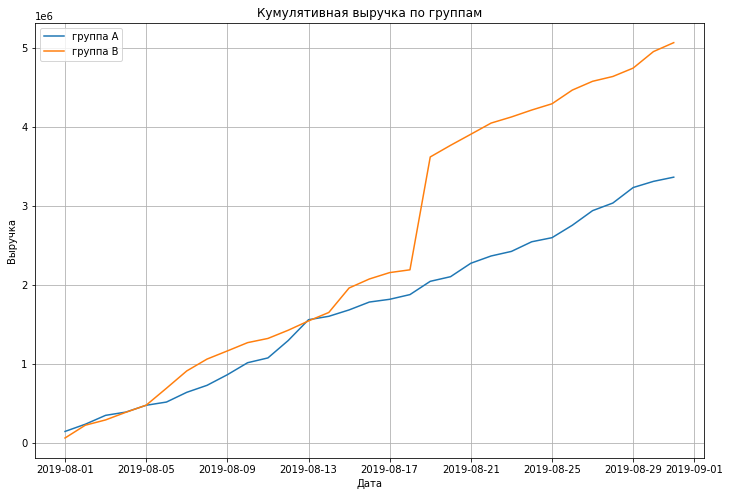

In [24]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(12,8))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='группа A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='группа B')
plt.title('Кумулятивная выручка по группам')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.grid()
plt.legend()
plt.show()

**Вывод:** в начале проведения теста и до его середины выручка почти равномерно увеличивается в обеих группах, однако далее происходит резкий скачок в группе B, и после показатели не снижаются снова к прежнему уровню. Наличие резкого изменения могло бы указывать на всплеск числа заказов или же о появлении очень дорогих заказов (которые могут быть выбросами, их проанализируем далее), однако дальше видим стабильный продолжающийся рост кумулятивной выручки. Важно отметить, что размер кумулятивной выручки группы А также стабильно растет до окончания теста.

**Построим график кумулятивного среднего чека по группам**

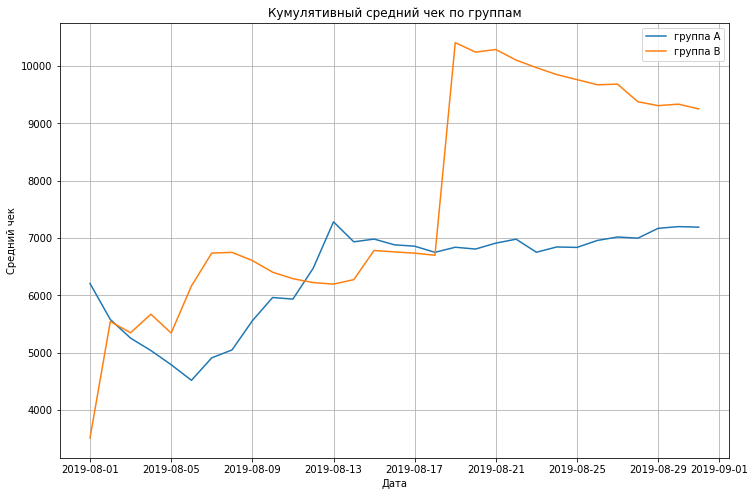

In [25]:
plt.figure(figsize=(12,8))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='группа A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='группа B')
plt.title('Кумулятивный средний чек по группам')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.grid()
plt.legend()

**Вывод:** интересная картина. Видим, что результаты стабилизировались в обеих группах ближе ко второй половине теста. Средний чек группы А имеет рост, но незначительный. А вот средний чек группы В наоборот подает, однако с высоты того самого всплеска, который был нами обнаружен ранее. Однозначно необходимо проверить выбросы. Возможно, группе В нужно больше данных, чтобы прийти к реальному среднему чеку и установиться на его уровне.

**Построим график относительного изменения кумулятивного среднего чека группы В к группе А**

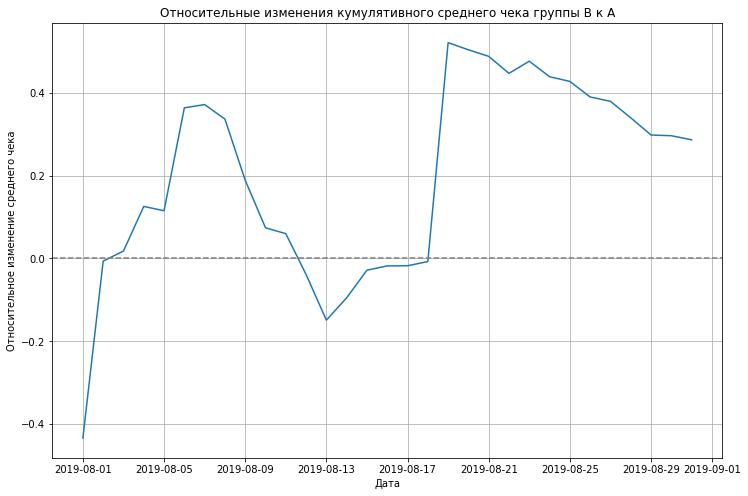

In [26]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(12,8))
plt.plot(mergedCumulativeRevenue['date'], 
         (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(
             mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.title('Относительные изменения кумулятивного среднего чека группы В к А')
plt.xlabel('Дата')
plt.ylabel('Относительное изменение среднего чека')
plt.grid()
plt.axhline(y=0, color='grey', linestyle='--');

**Вывод:** в нескольких точках график различия между сегментами резко «скачет». Делаем вывод, что крупные заказы и выбросы точно присутствуют. В начале теста кумулятивный средний чек был значительно больше у группы А, чем у группы В. Тем не менее наличие спада ниже нулевого значения к середниче теста говорит о том, что группа А не на долго вырвалась вперед, однако далее группа В все же одержала верх (вероятно, из-за резкого увеличения среднего чека в результате крупных покупок). 

**Построим график кумулятивного среднего кол-ва заказов на посетителя по группам**

(18108.0, 18140.0, 0.023, 0.037)

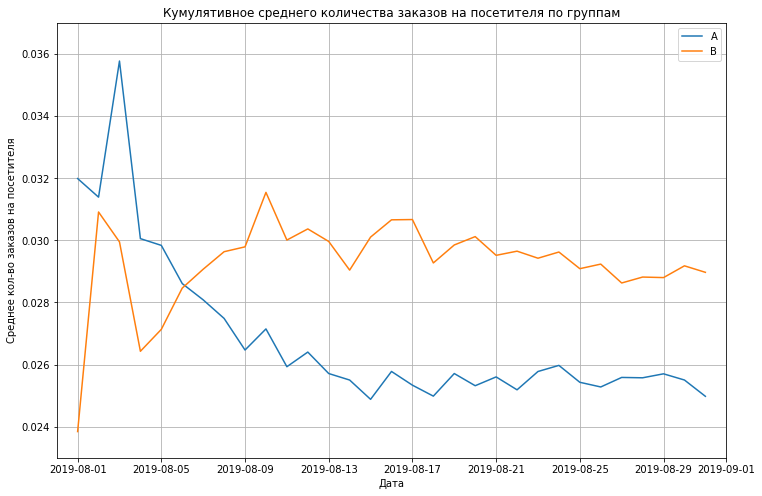

In [27]:
cumulativeData['order_visitor'] = (cumulativeData['orders'] / cumulativeData['visitors'])

cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

plt.figure(figsize=(12,8))
plt.plot(cumulativeDataA['date'], cumulativeDataA['orders']/cumulativeDataA['visitors'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['orders']/cumulativeDataB['visitors'], label='B')
plt.title('Кумулятивное среднего количества заказов на посетителя по группам')
plt.xlabel('Дата')
plt.ylabel('Среднее кол-во заказов на посетителя')
plt.grid()
plt.legend()
plt.axis([dt.datetime(2019, 7, 31), dt.datetime(2019, 9, 1), 0.023, 0.037])

**Вывод:** группы колебались около одного значения, но затем у группы В среднее количество заказов вырвалось вперёд, некоторые колебания остались, но не такие резкие, как в начале теста. У группы А среднее кол-во заказов после скачка сильно просело и продолжило падать также с небольшими колебаниями. Важно отметить, что среднее кумулятивное кол-во заказов группы А спадало до конца теста. Также и у группы В, но ближе ко второй половине теста среднее стабилизировалось.

**Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы В к группе А**

(18108.0, 18140.0, -0.3, 0.3)

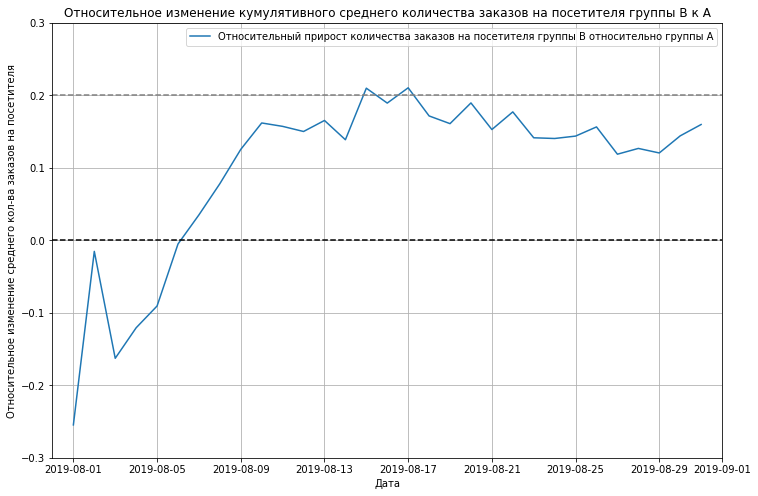

In [28]:
mergedCumulativeData = cumulativeDataA[['date','order_visitor']].merge(
    cumulativeDataB[['date','order_visitor']], 
    left_on='date', 
    right_on='date', 
    how='left', 
    suffixes=['A', 'B'])

plt.figure(figsize=(12,8))
plt.plot(mergedCumulativeData['date'], 
         mergedCumulativeData['order_visitorB']/mergedCumulativeData['order_visitorA']-1, 
         label="Относительный прирост количества заказов на посетителя группы B относительно группы A")
plt.title('Относительное изменение кумулятивного среднего количества заказов на посетителя группы В к А')
plt.xlabel('Дата')
plt.ylabel('Относительное изменение среднего кол-ва заказов на посетителя')
plt.grid()
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.axis(["2019-07-31", '2019-09-01', -0.3, 0.3])

**Вывод:**: в начале теста группа B проигрывала группе A, затем вырвалась вперёд. Далее среднее количество заказов на посетителя для группы B скакало. Уверенно можем сказать, что среднее кол-во заказов было больше на ~15% уже спустя неделю тестирования и до его конца не опускалось ниже 12%.

**Построим точечный график кол-ва заказов по пользователям**

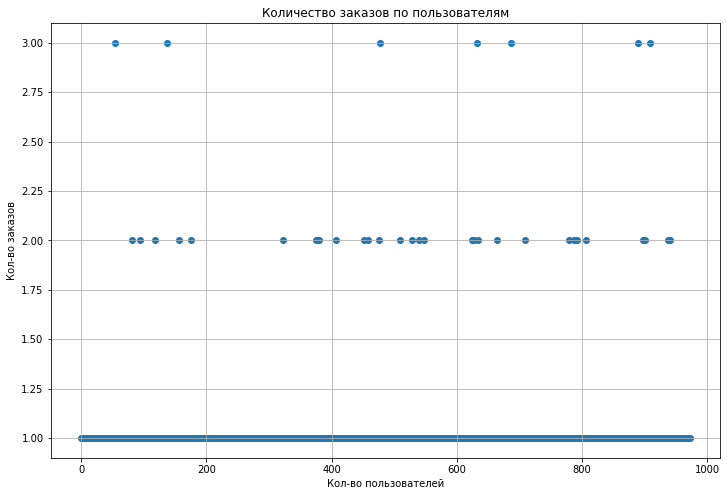

In [29]:

ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
ordersByUsers.columns = ['userId', 'orders']

plt.figure(figsize=(12,8))
plt.grid()
plt.title('Количество заказов по пользователям')
plt.xlabel('Кол-во пользователей')
plt.ylabel('Кол-во заказов')

x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders'])

**Вывод**: чаще всего пользователи делают 1-2 заказа, 3 заказа - редкий случай.

**Вычисление 95-го и 99-го перцентилей кол-ва заказов на одного пользователя**

In [30]:
np.percentile(ordersByUsers['orders'],[95,99])

array([1., 2.])

**Вывод**: не более 5% пользователей делали 1 заказ, и не более 2-х заказов делали 1% пользователей. За границу диапазона фильтрации примем кол-во заказов равное 2.

**Построим точечный график стоимости заказов**

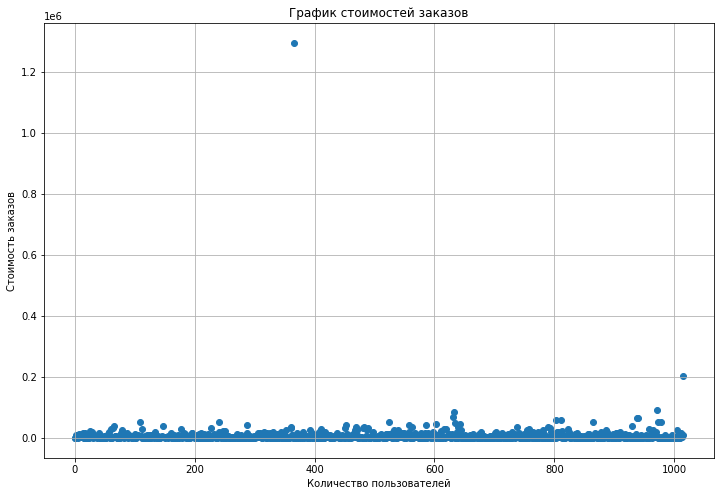

In [31]:
RevenueByUsers = pd.Series(range(0, len(orders['revenue'])))

plt.figure(figsize=(12,8))
plt.grid()
plt.title('График стоимостей заказов')
plt.xlabel('Количество пользователей')
plt.ylabel('Стоимость заказов')

plt.scatter(RevenueByUsers, orders['revenue'])

**Вывод:** видим те самые выбросы - около 200 тыс. р. и чуть больше 1,2 млн р. Чаще всего пользователи делали заказы стоимостью не более 150 тыс. р. 

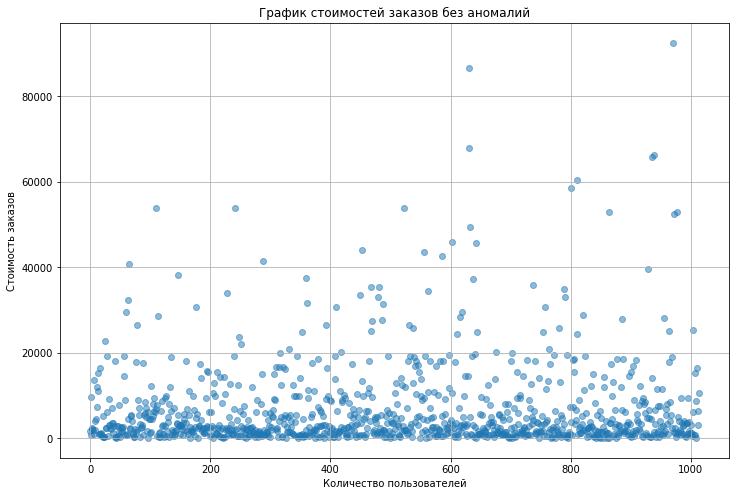

In [32]:
#посмотрим на график без выбросов
#за верхнюю границу стоимости возьмем 200 тыс. р.

result = orders[orders['revenue']<202000]['revenue']
xn_values = pd.Series(range(0,len(result)))

plt.figure(figsize=(12,8))
plt.grid()
plt.title('График стоимостей заказов без аномалий')
plt.xlabel('Количество пользователей')
plt.ylabel('Стоимость заказов')
plt.scatter(xn_values, result, alpha=0.5)


**Вывод:** судя по результатам, большая часть заказов стоит не более 40 тыс. р.

**Вычисление 95-го и 99-го перцентилей стоимости заказов**

In [33]:
np.percentile(orders['revenue'],[95,99])

array([26785., 53904.])

**Вывод:** не более 5% заказов стоят ~26 тыс. р. и не более 1% заказов стоят ~53 тыс. р. Таким образом верхней границей можем взять 54 тыс. р.

**Посчитаем статистическую значимость различий в среднем кол-ве заказов на посетителя между группами по «сырым» данным**

<br>Нулевая: различий в среднем кол-ве заказов на посетителя между группами А и В нет.
<br>Альтернативная: различия в среднем количестве заказов на посетителя между группами А и В есть.

<br>Для проверки предположения о нормальности распределения данных используем критерий Манна-Уитни, так как в данных присутствуют выбросы, т.е. другие методы существенно повлияют на результат.

In [34]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders'] 

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(visitors[visitors['group'] == 'A']['visitors'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(visitors[visitors['group'] == 'B']['visitors'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group'] == 'A']['visitors'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)


sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group'] == 'B']['visitors'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('Значение pvalue:', (st.mannwhitneyu(sampleA, sampleB)[1]).round(3), '\n' 
      'Относительная разница между группами:', ((sampleB.mean()/sampleA.mean() - 1).round(3)))

Значение pvalue: 0.011 
Относительная разница между группами: 0.16


**Вывод:** pvalue вышел менее 0,05. Это значит, что мы должны отвергнуть нулевую гипотезу - статистически значимые отличия между группами А и В есть.

**Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным**

In [35]:
print('Значение pvalue:', (st.mannwhitneyu(
    orders[orders['group']=='A']['revenue'], 
    orders[orders['group']=='B']['revenue'])[1]).round(3), '\n'
      'Относительная разница между группами:', 
      (orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1).round(3))

Значение pvalue: 0.829 
Относительная разница между группами: 0.287


**Вывод:** pvalue больше 0,05, т.е. статистически значимых отличий между группами в среднем чеке нет. При этом все же можем выделить группу В, т.к. у нее прирост среднего чека почти 29% относительно группы А.

**Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным**

In [36]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > np.percentile(ordersByUsers['orders'], 99)]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > np.percentile(ordersByUsers['orders'], 99)]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 53904]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print('Абсолютные потери(количество аномальных пользователей):', len(abnormalUsers), '\n',
      'Относительные потери:', (len(abnormalUsers)/orders['visitorId'].nunique(),round(3)))

Абсолютные потери(количество аномальных пользователей): 16 
 Относительные потери: (0.01644398766700925, 3)


In [37]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group'] == 'A']['visitors'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group'] == 'B']['visitors'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
print('Значение P-value:', (st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]).round(3), '\n',
      'Относительная разница между группами:', (sampleBFiltered.mean()/sampleAFiltered.mean()-1).round(3))

Значение P-value: 0.007 
 Относительная разница между группами: 0.189


**Вывод:** как и до исключения выбросов, можем сказать, что статистическая значимость между группами есть - показатели группы В лучше показателей группы А.

**Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным**

In [38]:
print('Значение P-value:', (
        (st.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1].round(3))
    )
)

print('Относительная разница между группами:', (
        (orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1).round(3)
    )
)

Значение P-value: 0.788
Относительная разница между группами: -0.032


**Вывод:** средний чек группы B на 3,2% ниже среднего чека группы A, в то время как по "сырым" данным, он был больше почти в 10 раз, что указывает на вляние дорогостоящих заказов.

## Общий вывод


Была проведена предобработка данных - в датасетах изменены тип данных столбцов с датами на корректные. Также были удалены данные по заказам пользователей, попавших сразу в обе тестируемые группы (15% от всех данных).

В ходе анализа результатов теста были услановлены предельные значения среднего кол-ва заказов (2) и суммы среднего чека (54 тыс р.).

По результатам проведенного исследования предлагаю остановить тест и зафиксировать победу группы В. По кумулятивным метрикам по выручке, среднему чеку и конверсии лидировала группа B. После очистки разница между средними чеками стала минимальна, но это не даёт нам повода сомневаться в проведении теста и его результатах. До и после очистки данных, показатель конверсии группы B больше показателя группы A - сначала на 15% до и на 18% после очистки данных. Такая разница показателей конверсии между группами и до, и после очистки данных является статистически значимой. По среднему чеку статистически значимой разницы между группами как по "сырым" там и по "очищенным" данным нет.